In [1]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
def read_book(url):
    return urlopen(url).read()

In [3]:
def to_lower(text):
    return text.lower()
def decode_book(book):
    return book.decode('utf-8')
def remove_urls(text):
    return re.sub(r"http\S+", "", text)
def print_title_len(book):
    print(book[:80],len(book))

In [4]:
def remove_unwanted_part (text):
    fstart = text.find('START')
    fend = text.find('END ')
    print("Discarding Before - ", fstart)
    print("Discarding After - ", fend)
    text = text[fstart:fend]
    return text

In [5]:
def decontract(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

p = inflect.engine() #singularizes plural English word
def numbers_to_words(text):
    list_of_words = text.split()
    modified_text = []

    for num in list_of_words:
        if num.isdigit():
            number_to_word = p.number_to_words(num)
            modified_text.append(number_to_word)
        else:
            modified_text.append(num)
      
    return ' '.join(modified_text)

In [6]:
def remove_punctuation(text):
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    return ' '.join(words)

lemmatizer = WordNetLemmatizer() # to lemmatize, preferring lemmmatizing over stemming
def lemmatize_word(text): 
    token_word = word_tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in token_word] 
    return ' '.join(lemmas)

def plot_cloud(wordcloud):
    plt.figure(figsize=(50, 40)) # figure size
    plt.imshow(wordcloud) # for image
    plt.axis("off"); # for not including axis

In [7]:
url_book1 = 'https://www.gutenberg.org/files/12410/12410-0.txt'
url_book2 = 'https://www.gutenberg.org/files/66744/66744-0.txt'

def PreProcessBook(url):
    book = read_book(url)
    print_title_len(book)
    text = decode_book(book)
    text = remove_unwanted_part(text)
    text = to_lower(text)
    text = remove_urls(text)
    text = decontract(text)
    text = numbers_to_words(text)
    text = remove_punctuation(text)
    text = lemmatize_word(text)
    return (text)

In [8]:
book1 = read_book(url_book1)
print(book1[:1000])

b'\xef\xbb\xbfThe Project Gutenberg eBook of The Travels of Marco Polo, by Marco Polo\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Travels of Marco Polo\r\n       Volume 2\r\n\r\nAuthor: Marco Polo\r\n\r\nEditor: Henri Cordier\r\n\r\nTranslator: Henry Yule\r\n\r\nRelease Date: November 15, 2021 [eBook #12410]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Charles Franks, Robert Connal, John Williams and PG\r\n             Distributed Proofreaders, updated by Robert Tonsing\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOO

In [9]:
book2 = read_book(url_book2)
print(book2[:1000])

b'\xef\xbb\xbfThe Project Gutenberg eBook of The Life of the Scorpion, by Jean-Henri\r\nFabre\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Life of the Scorpion\r\n\r\nAuthor: Jean-Henri Fabre\r\n\r\nTranslator: Alexander Teixeira de Mattos\r\n            Bernard Miall\r\n\r\nRelease Date: November 15, 2021 [eBook #66744]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Jeroen Hellingman and the Online Distributed Proofreading\r\n             Team at https://www.pgdp.net/ for Project Gutenberg (This file\r\n             w

In [10]:
book1_text = PreProcessBook(url_book1)
book2_text = PreProcessBook(url_book2)

b'\xef\xbb\xbfThe Project Gutenberg eBook of The Travels of Marco Polo, by Marco Polo\r\n\r\nTh' 2420936
Discarding Before -  896
Discarding After -  2361075
b'\xef\xbb\xbfThe Project Gutenberg eBook of The Life of the Scorpion, by Jean-Henri\r\nFabre' 393185
Discarding Before -  1050
Discarding After -  373241


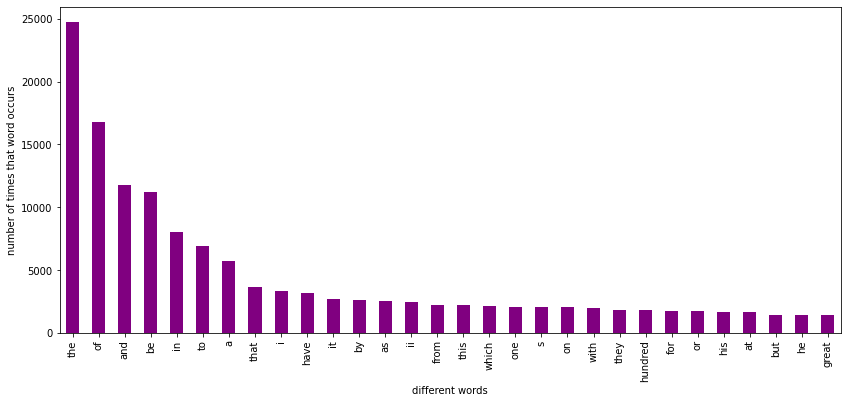

In [47]:
plt.figure(figsize=(14,6))
word_tokens_book1 = word_tokenize(book1_text) 
plt.xlabel("different words")
plt.ylabel("number of times that word occurs")
pd.Series(word_tokens_book1).value_counts()[:30].plot(kind='bar',color="purple");

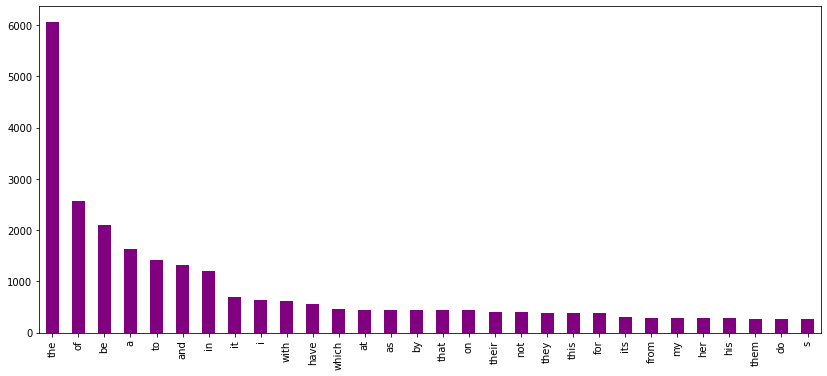

In [44]:
plt.figure(figsize=(14,6))
word_tokens_book2 = word_tokenize(book2_text) 
pd.Series(word_tokens_book2).value_counts()[:30].plot(kind='bar',color="purple");

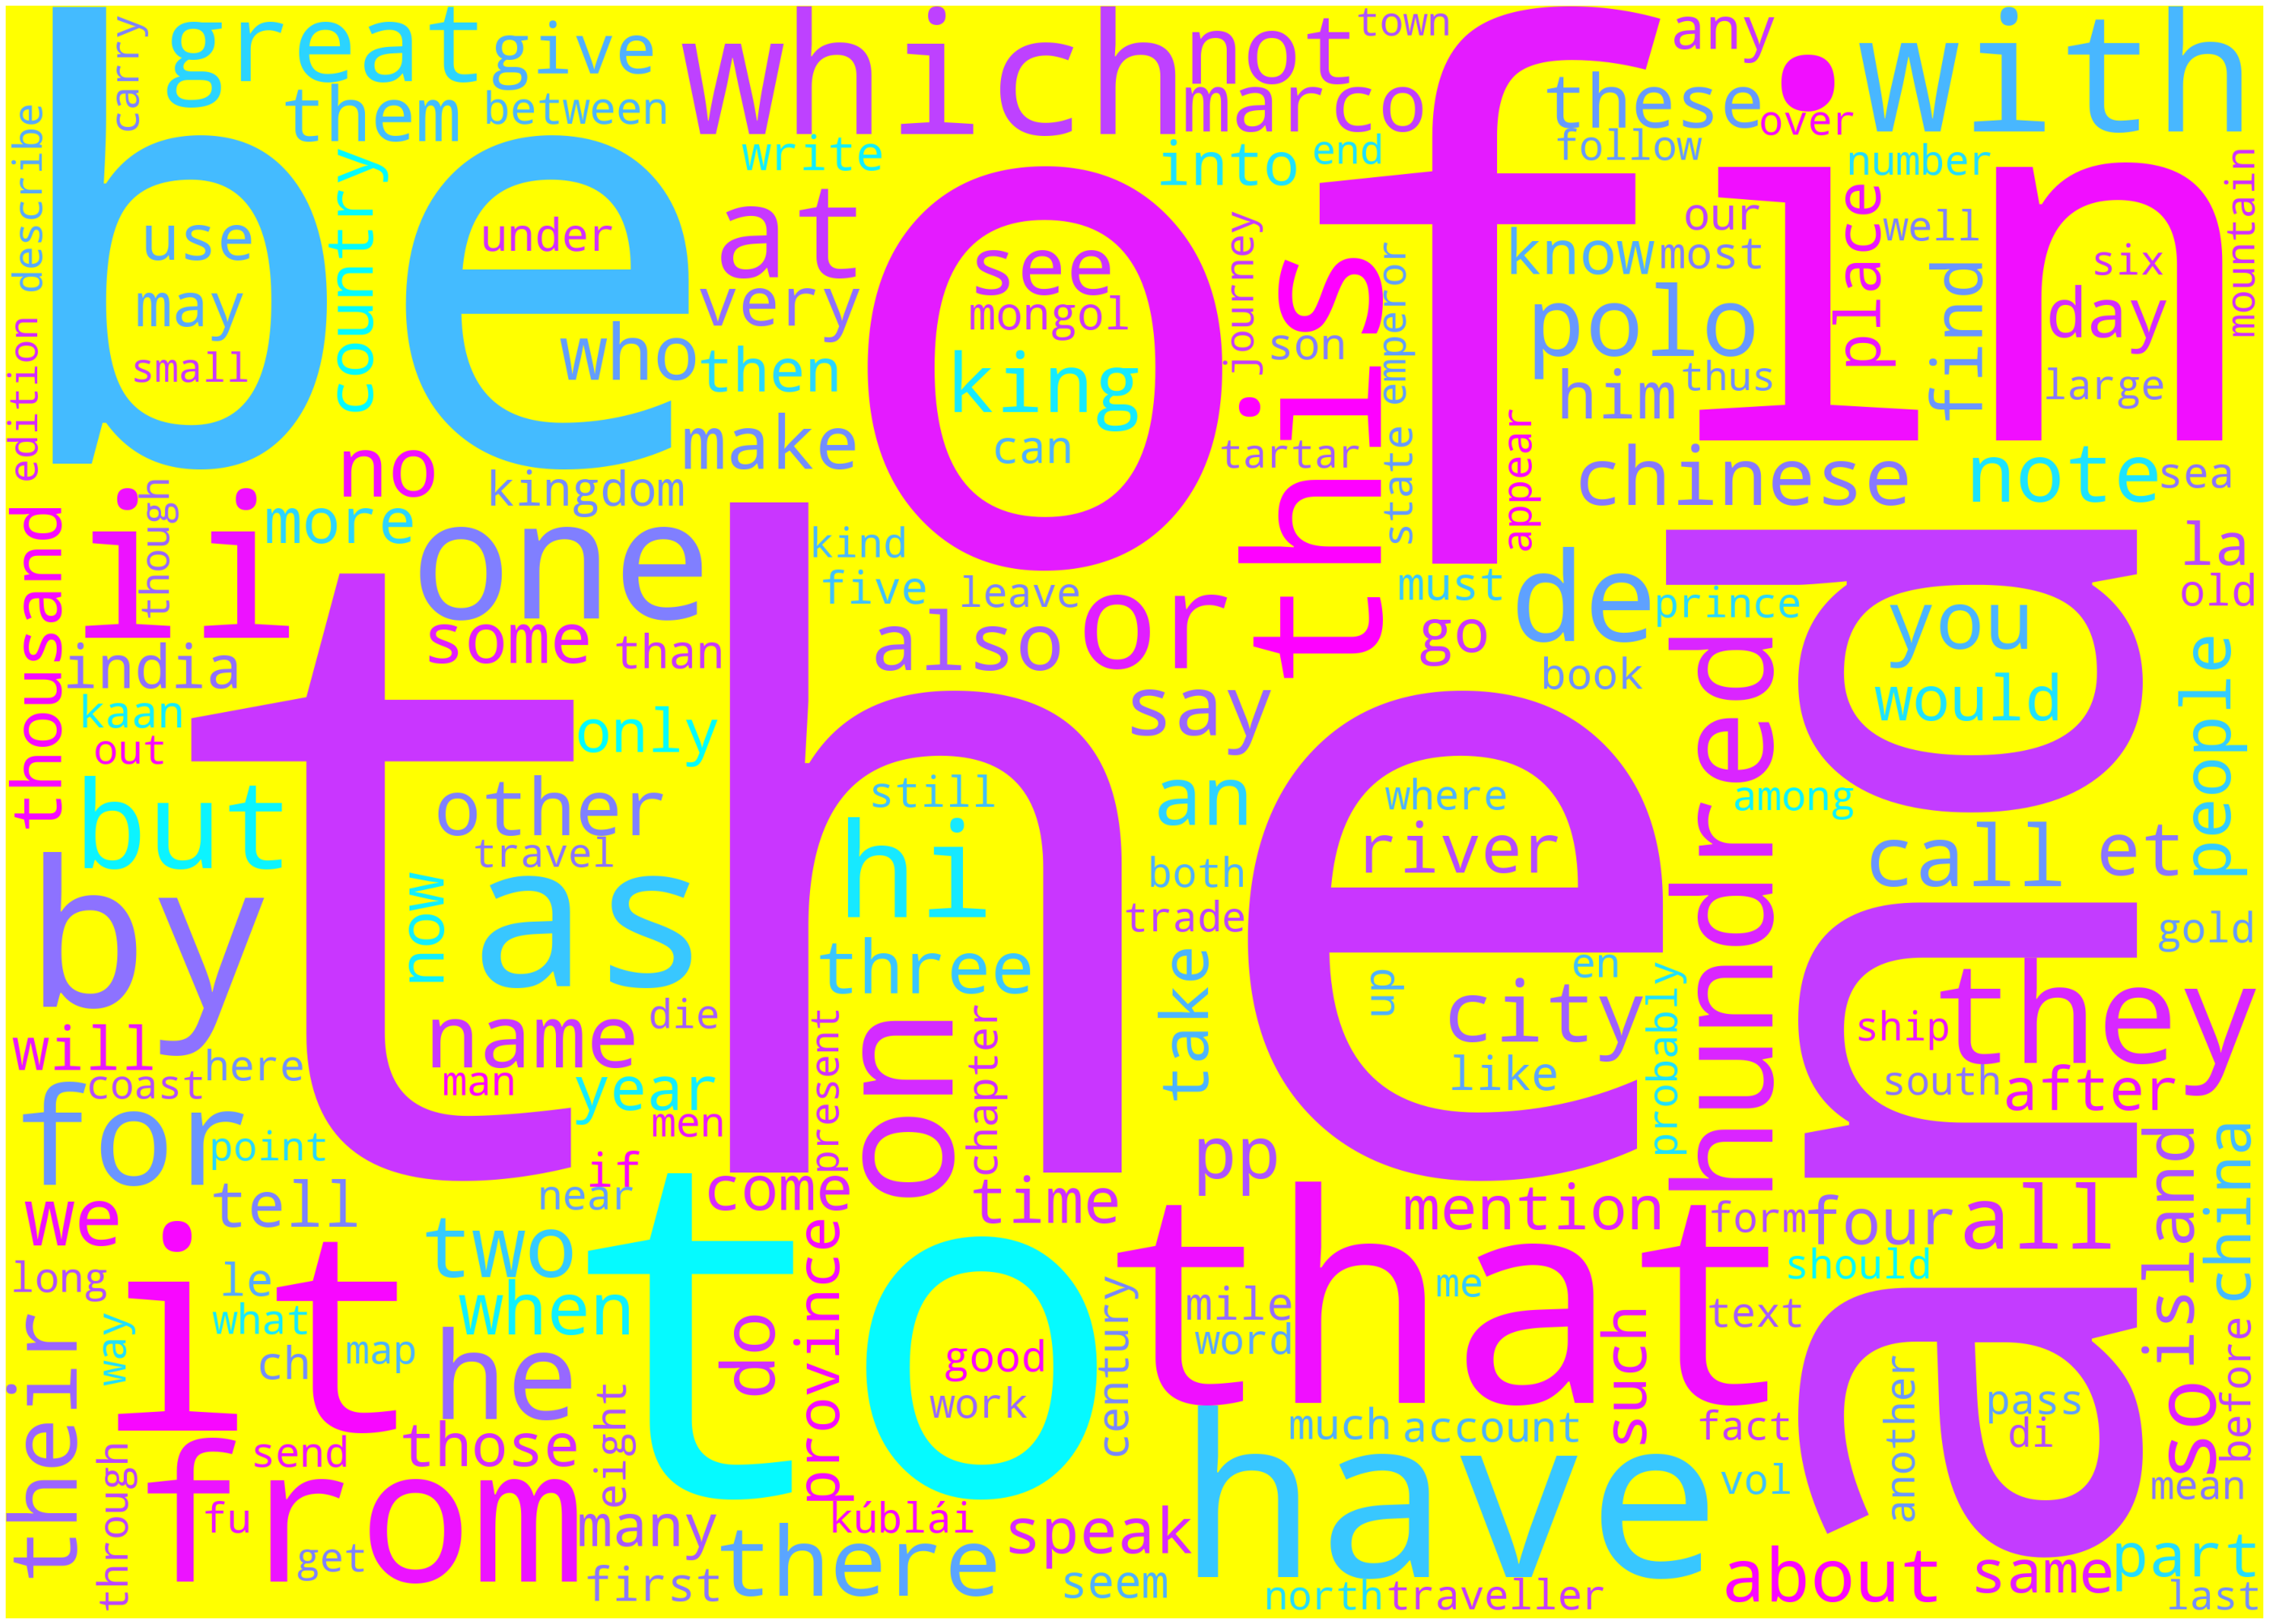

In [13]:
wordcloud = WordCloud(width = 3500, height = 2500, random_state=1, background_color='yellow', colormap='cool',stopwords= [], collocations=False).generate(' '.join(word_tokens_book1))
plot_cloud(wordcloud)

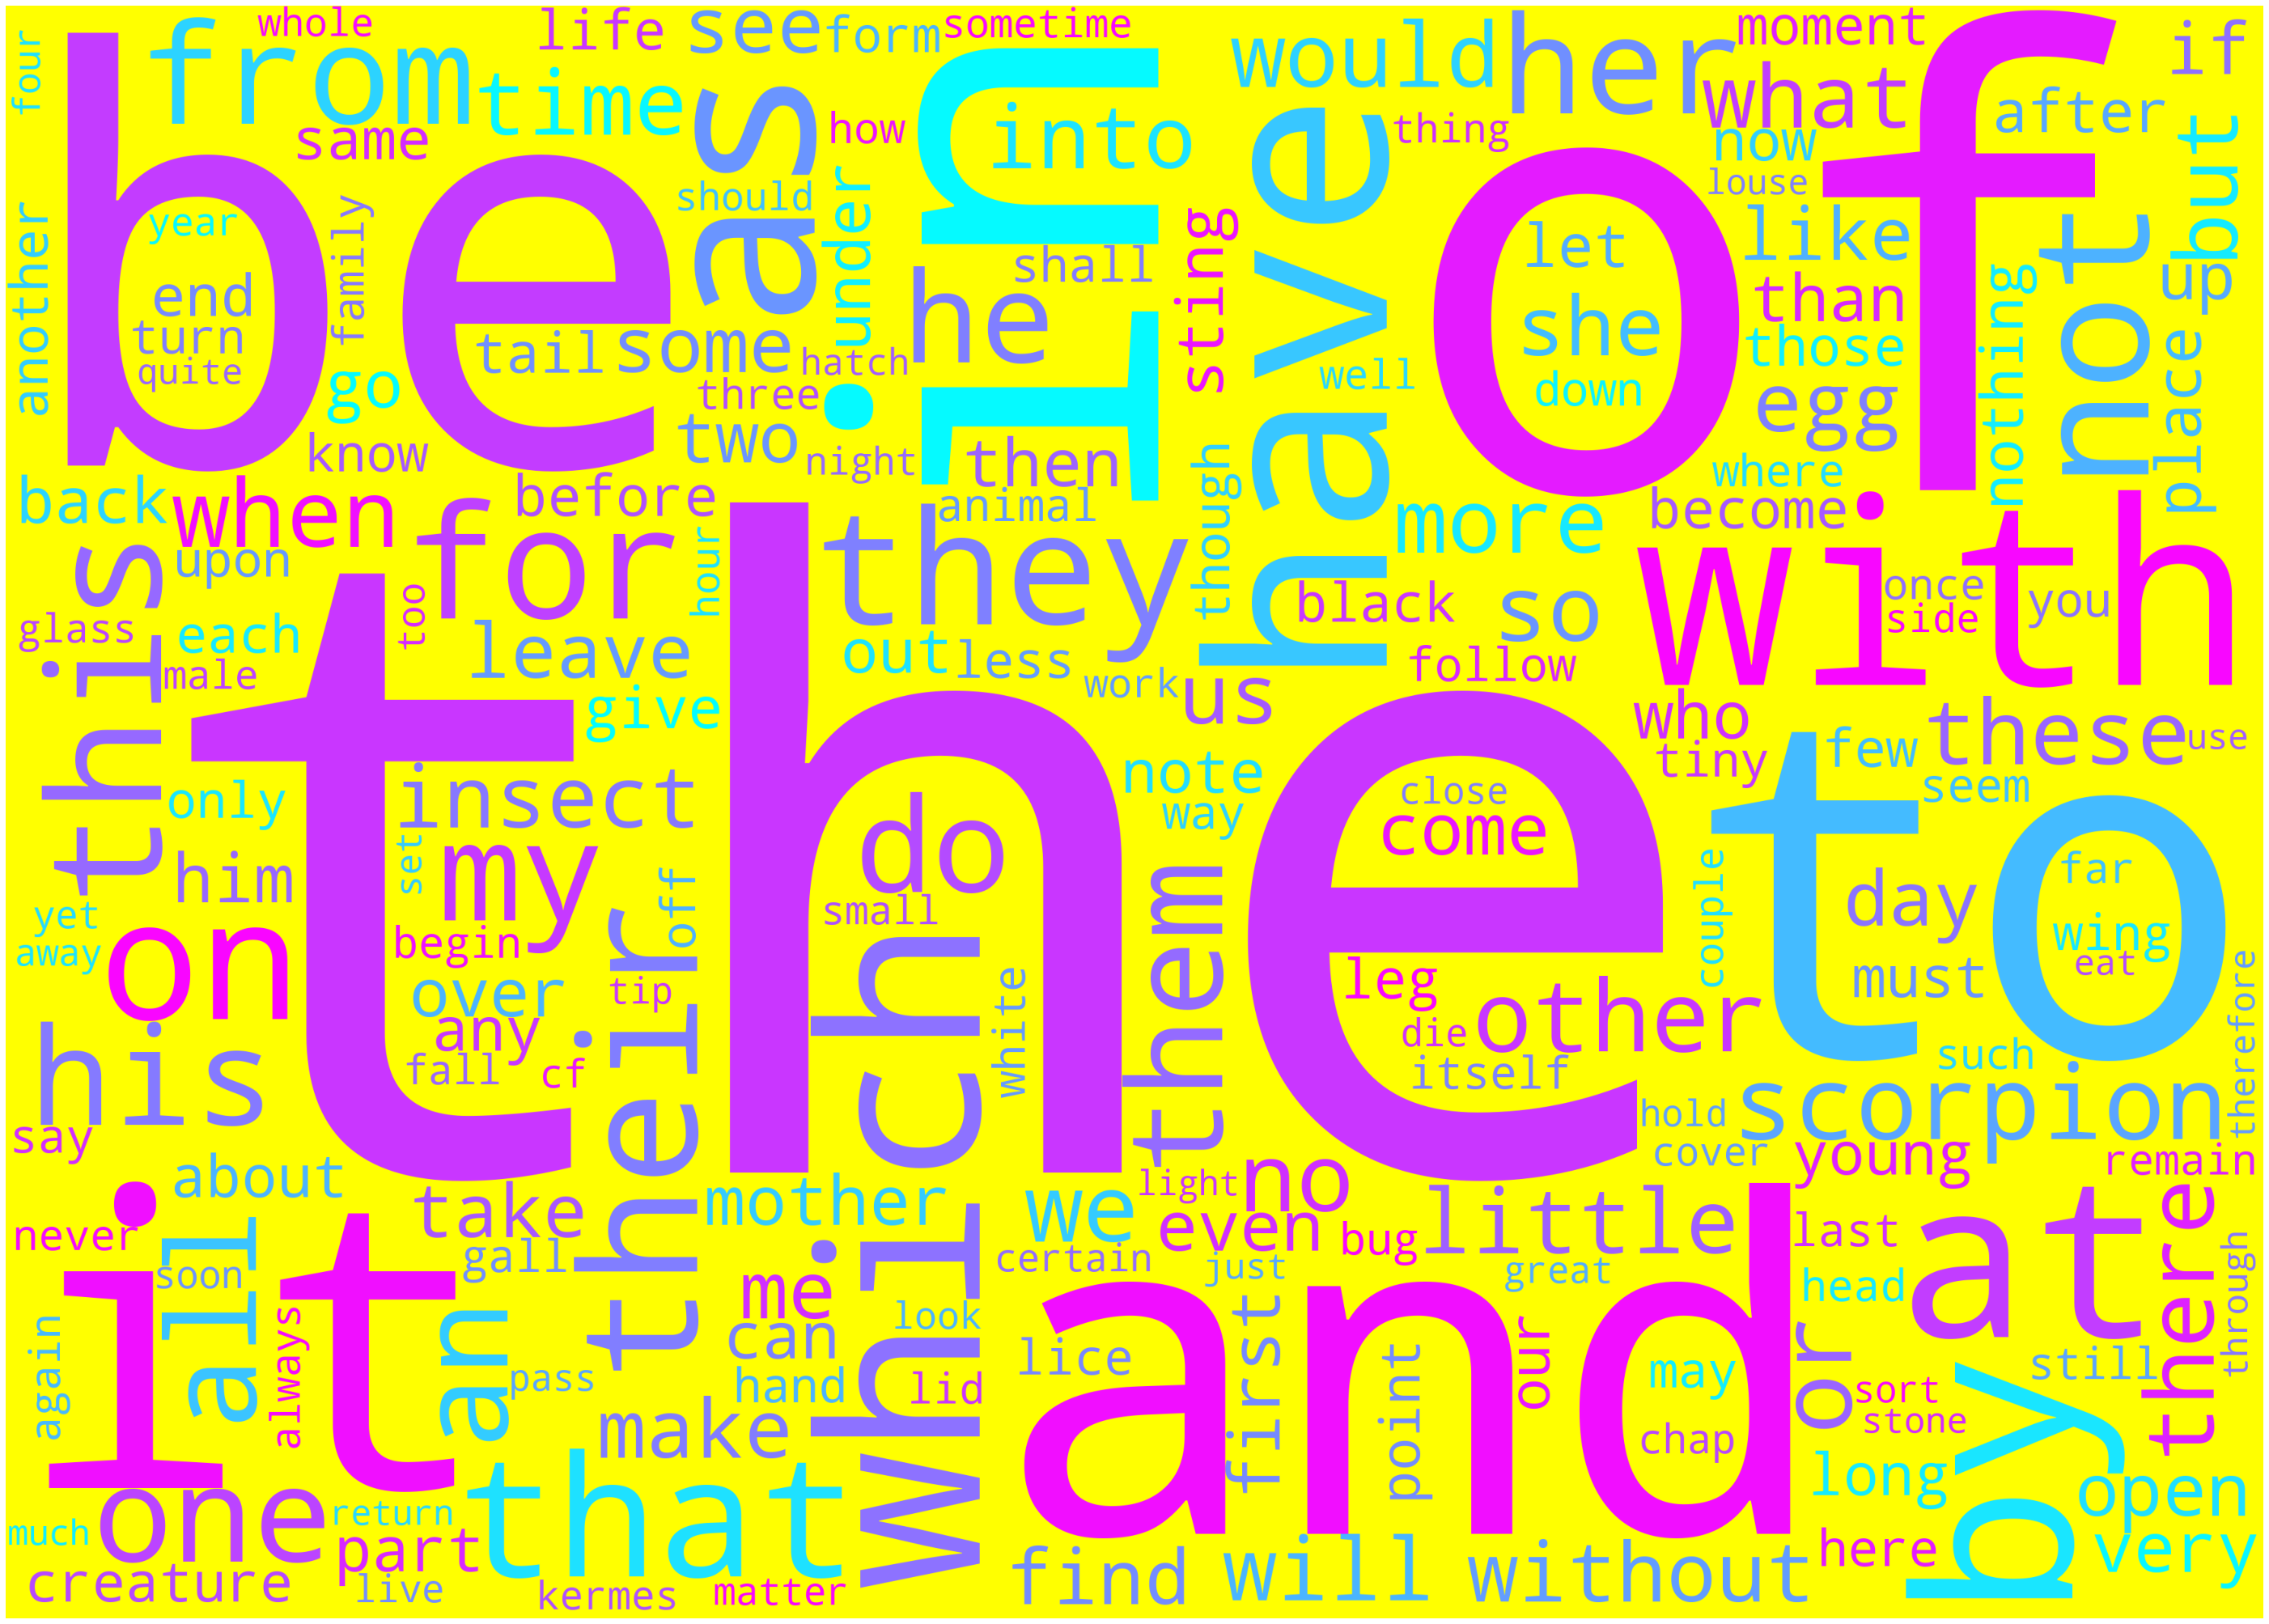

In [14]:
wordcloud = WordCloud(width = 3500, height = 2500, random_state=1, background_color='yellow', colormap='cool',stopwords= [], collocations=False).generate(' '.join(word_tokens_book2))
plot_cloud(wordcloud)

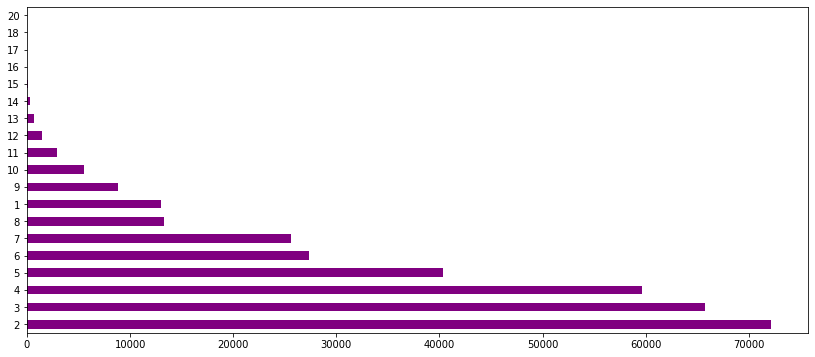

In [45]:
plt.figure(figsize=(14,6))
length_book_1 = [len(word) for word in word_tokens_book1]
pd.Series(length_book_1).value_counts()[:30].plot(kind='barh',color="purple");

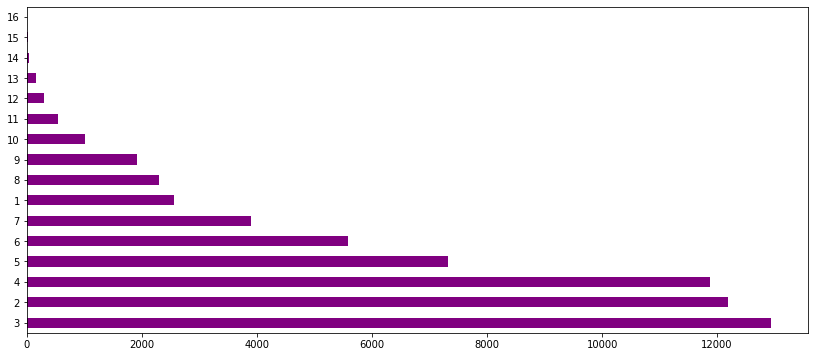

In [51]:
plt.figure(figsize=(14,6))
length_book_2 = [len(word) for word in word_tokens_book2]
pd.Series(length_book_2).value_counts()[:30].plot(kind='barh',color="purple");

In [17]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in STOPWORDS]

In [18]:
word_tokens_book1 = remove_stopwords(word_tokens_book1)
word_tokens_book2 = remove_stopwords(word_tokens_book2)

In [19]:
wordcloud = WordCloud(width = 3500, height = 2500, random_state=1, background_color='yellow', colormap='cool',stopwords= [], collocations=False).generate(' '.join(word_tokens_book1))
plot_cloud(wordcloud)

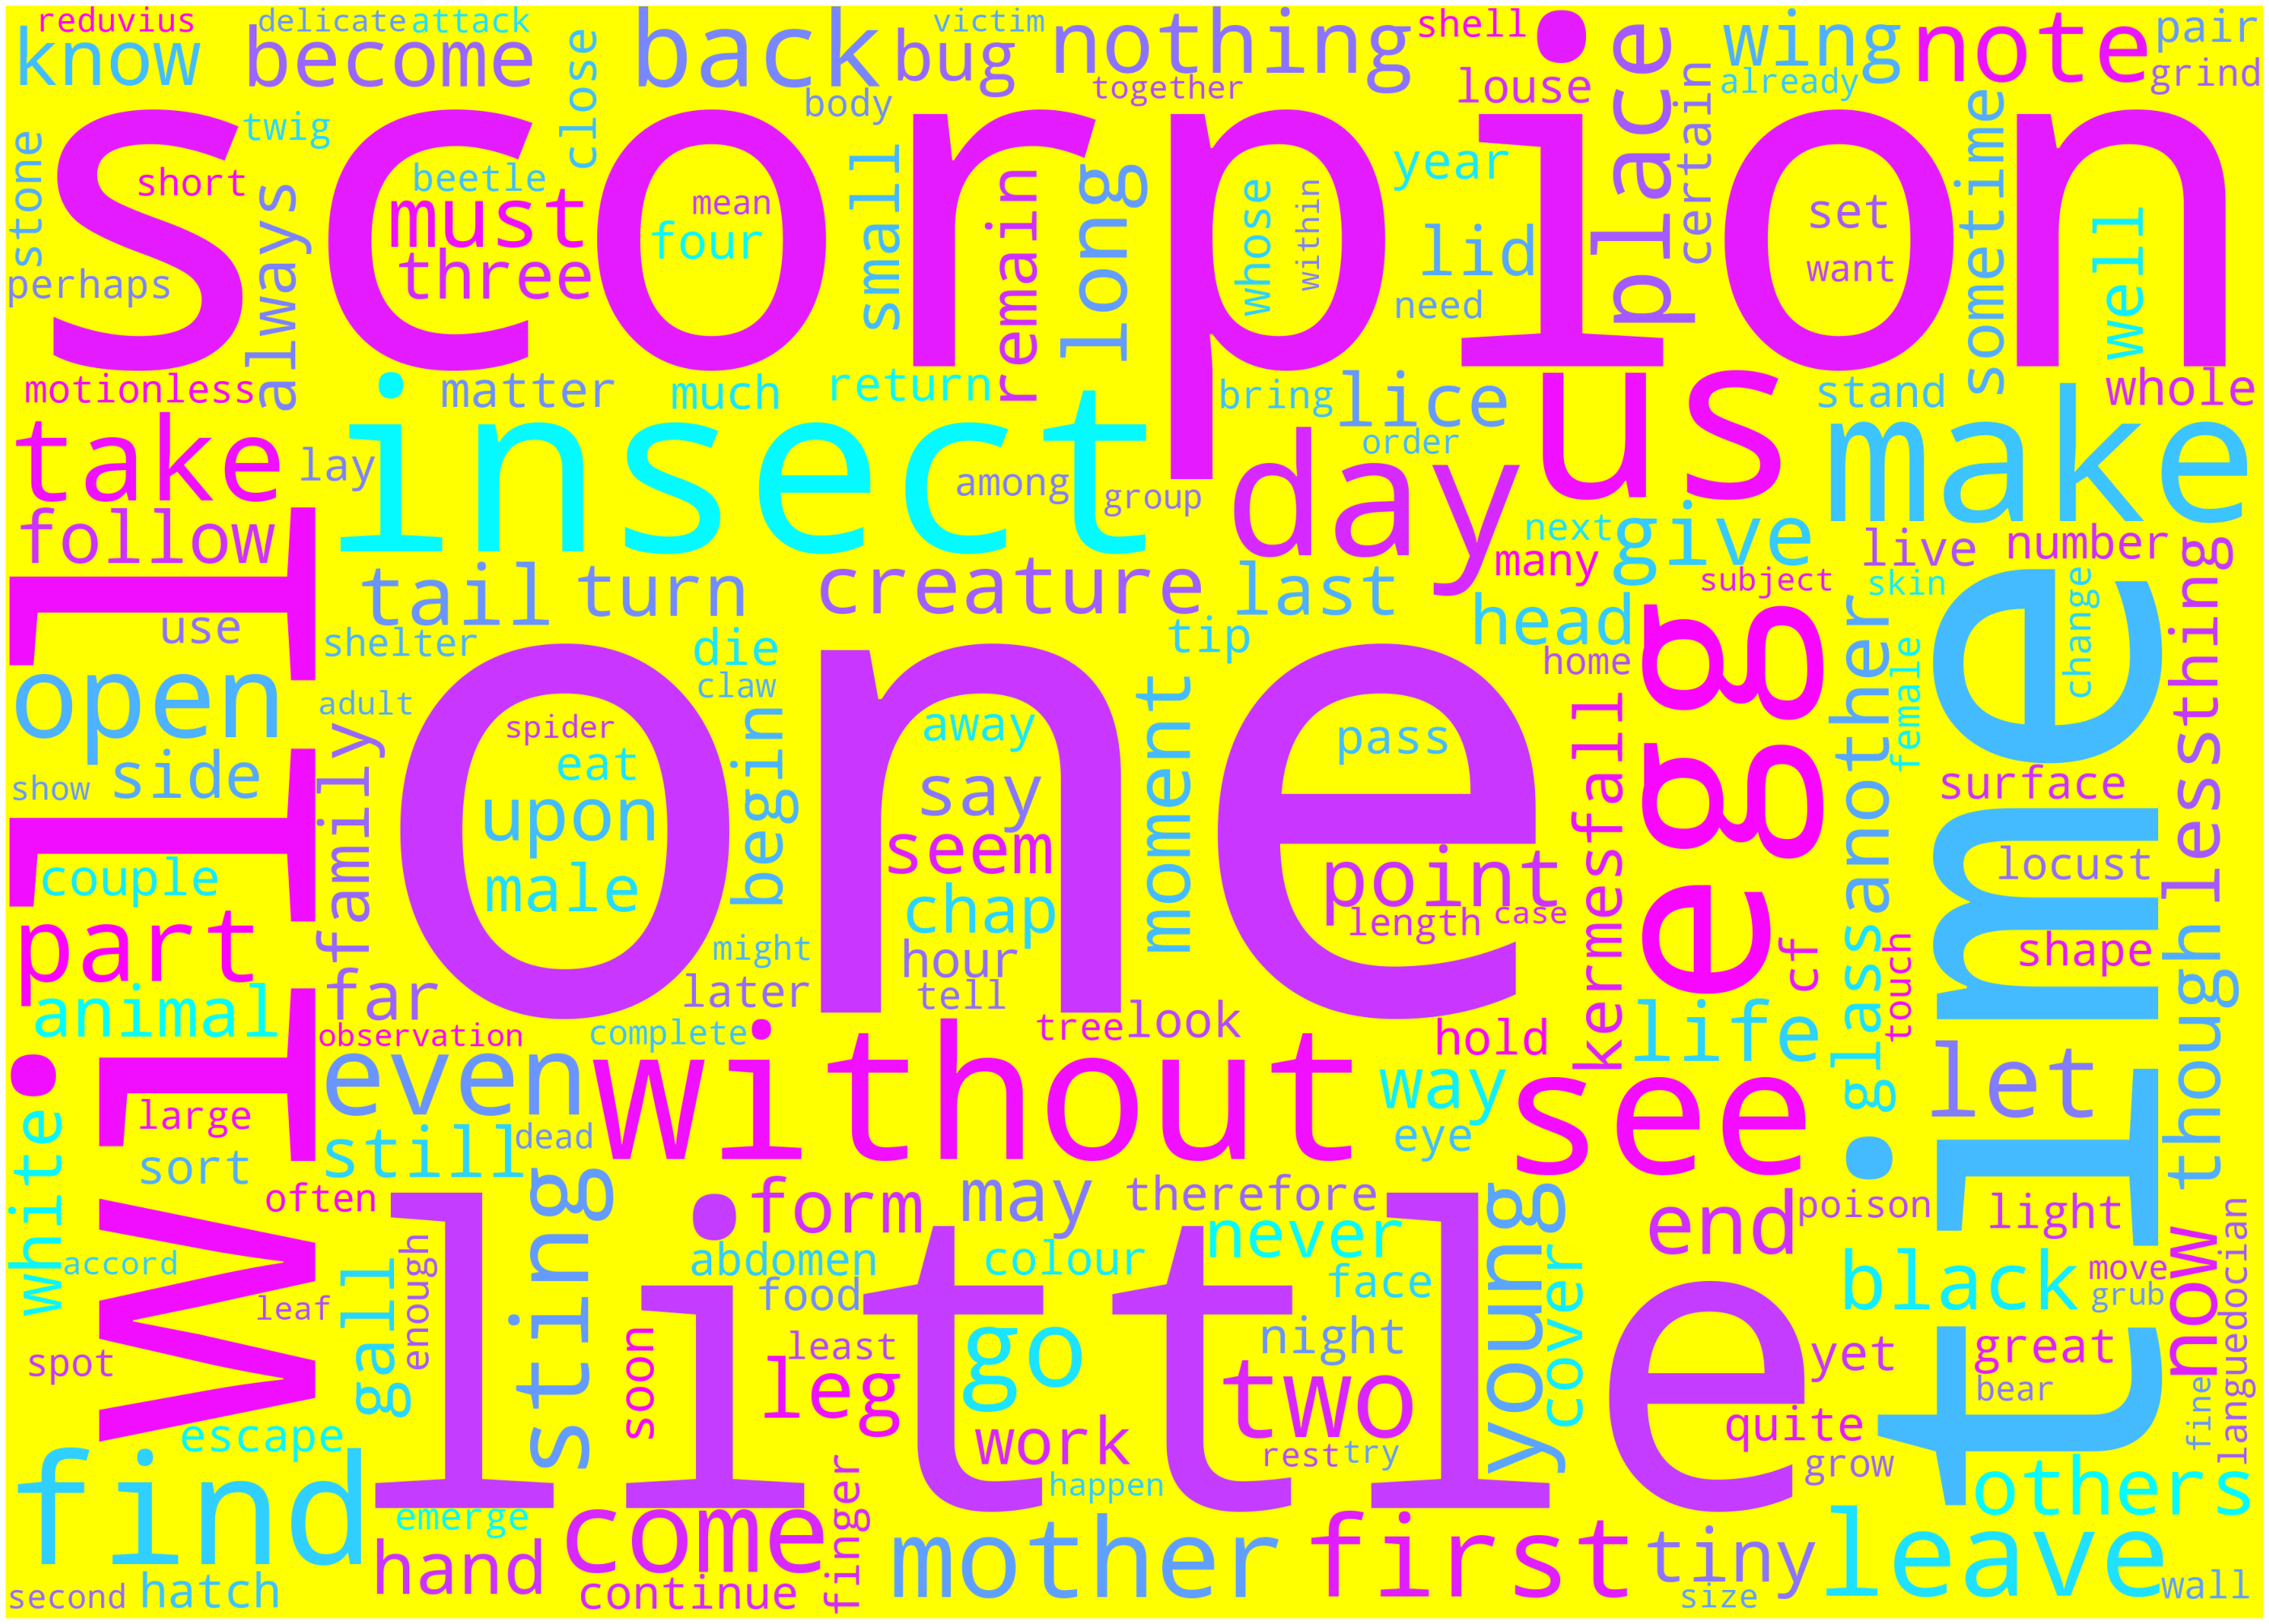

In [20]:
wordcloud = WordCloud(width = 3500, height = 2500, random_state=1, background_color='yellow', colormap='cool',stopwords= [], collocations=False).generate(' '.join(word_tokens_book2))
plot_cloud(wordcloud)

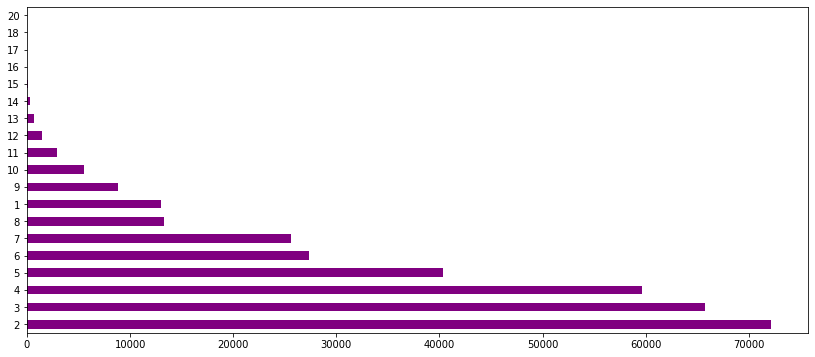

In [48]:
plt.figure(figsize=(14,6))
length_book1 = [len(word) for word in word_tokens_book1]
pd.Series(length_book1).value_counts()[:30].plot(kind='barh',color="purple");

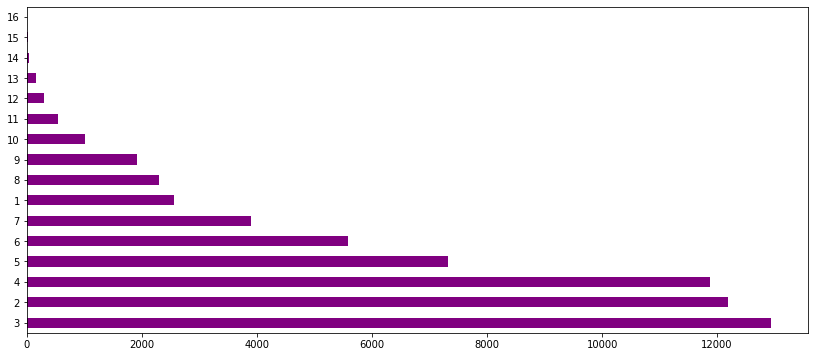

In [49]:
plt.figure(figsize=(14,6))
length_book2 = [len(word) for word in word_tokens_book2]
pd.Series(length_book2).value_counts()[:30].plot(kind='barh',color="purple")

In [25]:
def pos_tag(text):
    tagged=nltk.pos_tag(text)
    return tagged

def get_count(tags):
    counts = Counter( tag for word,  tag in tags)
    return counts

book1_tag=pos_tag(word_tokens_book1)
book1_pos_count=get_count(book1_tag)
book2_tag=pos_tag(word_tokens_book2)
book2_pos_count=get_count(book2_tag)

In [ ]:
print(book2_tag)

In [27]:
len(book1_pos_count)

32

In [28]:
len(book2_pos_count)

29

In [29]:
book1_pos_count

Counter({'$': 1,
         'CC': 247,
         'CD': 5705,
         'DT': 467,
         'EX': 1,
         'FW': 4085,
         'IN': 3675,
         'JJ': 36792,
         'JJR': 611,
         'JJS': 692,
         'MD': 1155,
         'NN': 83655,
         'NNP': 1129,
         'NNS': 12438,
         'POS': 3,
         'PRP': 188,
         'PRP$': 15,
         'RB': 8185,
         'RBR': 260,
         'RBS': 21,
         'RP': 42,
         'TO': 3,
         'VB': 4032,
         'VBD': 3179,
         'VBG': 958,
         'VBN': 691,
         'VBP': 13781,
         'VBZ': 1567,
         'WDT': 44,
         'WP': 46,
         'WP$': 95,
         'WRB': 30})

In [30]:
book2_pos_count

Counter({'CC': 37,
         'CD': 503,
         'DT': 103,
         'FW': 49,
         'IN': 688,
         'JJ': 7151,
         'JJR': 157,
         'JJS': 110,
         'MD': 330,
         'NN': 12666,
         'NNP': 23,
         'NNS': 1757,
         'PDT': 1,
         'PRP': 148,
         'PRP$': 3,
         'RB': 2378,
         'RBR': 110,
         'RP': 24,
         'UH': 1,
         'VB': 1137,
         'VBD': 369,
         'VBG': 209,
         'VBN': 165,
         'VBP': 2242,
         'VBZ': 240,
         'WDT': 12,
         'WP': 2,
         'WP$': 37,
         'WRB': 7})

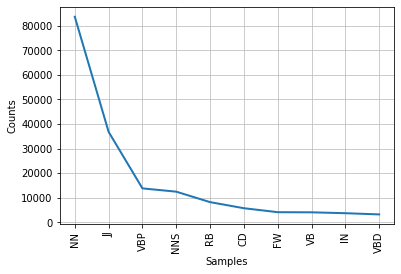

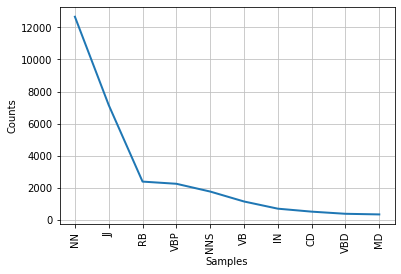

In [31]:
from nltk.probability import FreqDist
def frequency_distribution(tags):
    word_freqd = FreqDist(t for (w,t) in tags)
    word_freqd.plot(10)
    
frequency_distribution(book1_tag)
frequency_distribution(book2_tag)